## Applied Math Concepts for Machine Learning - Group 6

Students in group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

### Setting up environment

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#checking variable types
#Sex, ChestPainType, RestingECG, ExerciseAngina and ST_Slop are categorical variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#checking if target variable is balanced
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Data Preprocessing

#### Processing 'Sex' categorical column

In [7]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
df_dummies = pd.get_dummies(df['Sex'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['Sex']
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


#### Processing 'ChestPainType' categorical column

In [9]:
df_processed['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
df_processed['ChestPainType']= encoder.fit_transform(df_processed['ChestPainType'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [12]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

#### Processing 'RestingECG' categorical column

In [13]:
df_processed['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [14]:
encoder = LabelEncoder()
df_processed['RestingECG']= encoder.fit_transform(df_processed['RestingECG'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,N,0.0,Up,0,0,1


In [15]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'LVH': 0, 'Normal': 1, 'ST': 2}

#### Processing 'ExerciseAngina' categorical column

In [16]:
df_processed['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [17]:
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,0,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,1,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,0,0.0,Up,0,0,1


#### Processing 'ST_Slope' categorical column

In [18]:
df_processed['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [19]:
encoder = LabelEncoder()
df_processed['ST_Slope']= encoder.fit_transform(df_processed['ST_Slope'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [20]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'Down': 0, 'Flat': 1, 'Up': 2}

In [21]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int32  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int32  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int32  
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    int32  
 12  M               918 non-null    int32  
dtypes: float64(1), int32(5), int64(7)
memory usage: 75.4 KB


#### Dealing with null values

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

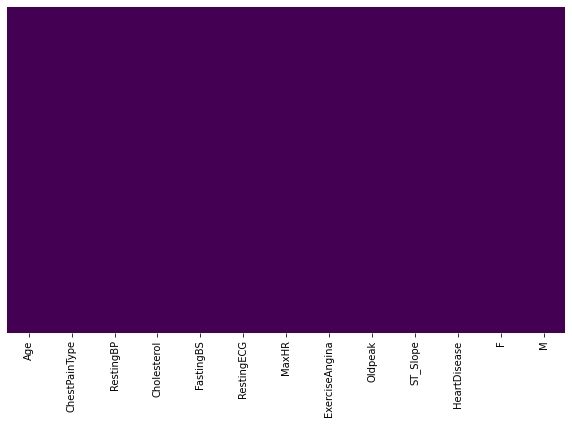

In [23]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

#### Splitting dataset

In [24]:
X = df_processed.drop('HeartDisease', axis=1)
X.shape

(918, 12)

In [25]:
y = df_processed['HeartDisease']
y.shape

(918,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

 ### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

#buidling the model
model = RandomForestClassifier(n_estimators=100, 
                               random_state=1, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

#fitting the model
features = list(df_processed.columns)
model.fit(X_train, y_train) #where X is the unlabelled train data and y is the target variable

#predictions
test_pred = model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [195]:
#evaluating model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy: {accuracy:.2}")

precision = precision_score(y_test, test_pred)
print(f"Precision: {precision:.2}")

recall = recall_score(y_test, test_pred)
print(f"Recall: {recall:.2}")

cm = confusion_matrix(y_test, test_pred)
print(f"Confusion matrix: \n {cm}")

Accuracy: 0.87
Precision: 0.92
Recall: 0.86
Confusion matrix: 
 [[ 96  13]
 [ 24 143]]


### GridSearchCV for Random Forest

In [182]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

grid_search.fit(X_train, y_train)


#find best parameters
print("Best Parameters: ", grid_search.best_params_)

parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
grid_pred = best_model.predict(X_test)

#evaluate model according to the parameters passed in refit
accuracy = accuracy_score(y_test, grid_pred)

print(f"Accuracy on Test Set: {accuracy:.2}")

precision = precision_score(y_test, grid_pred)
print(f"Precision on Test Set: {precision:.2}")

recall = recall_score(y_test, grid_pred)
print(f"Recall: {recall:.2}")

Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Accuracy on Test Set: 0.89
Precision on Test Set: 0.93
Recall: 0.89


Using the best parameters provided by GridSearchCV, we can see that there is an improvement in model performance.  
Precision improved from 0.92 to 0.93, accuracy improved from 0.87 to 0.89, and recall improved from 0.86 to 0.89.

### Auto feature selector

#### Feature selection

In [184]:
from sklearn.feature_selection import SelectFromModel

def embedded_rf_selector(X, y, num_feats):
    embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1), 
                                          max_features=10)
    embedded_rf_selector.fit(X, y)
    
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    
    return embedded_rf_support, embedded_rf_feature

embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats=10)

print(f'{len(embedded_rf_feature)} selected features: {embedded_rf_feature}')

6 selected features: ['ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


#### Analysis with selected columns

In [192]:
X_train_selected = X_train[embedded_rf_feature]
X_test_selected = X_test[embedded_rf_feature]

#giving best features to model with best parameters from GridSearchCV
selected_feat = RandomForestClassifier(**parameters, random_state=1)


selected_feat.fit(X_train_selected, y_train)
y_pred_selected = selected_feat.predict(X_test_selected)



#selected_feat = best_model.fit(X_train_selected, y_train)
#y_pred_selected = selected_feat.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy: {accuracy:.2}")

precision = precision_score(y_test, y_pred_selected)
print(f"Precision: {precision:.2}")

recall = recall_score(y_test, y_pred_selected)
print(f"Recall: {recall:.2}")

new_cm = confusion_matrix(y_test, y_pred_selected)
print(f"\n Confusion matrix: \n {new_cm}")

cm = confusion_matrix(y_test, test_pred)
print(f"\n Original confusion matrix: \n {cm}")

Accuracy: 0.8586956521739131
Precision: 0.8855421686746988
Recall: 0.8802395209580839

 Confusion matrix: 
 [[ 90  19]
 [ 20 147]]

 Original confusion matrix: 
 [[ 96  13]
 [ 24 143]]


Surprisingly, fitting the model for the best features has given us worse results than the base RandomForest model.

Accuracy, Precision and Recall has all been lowered compared to the previous scores or 0.89, 0.93 and 0.89 respectively.  
When we compare confusion matrices, we can see that the model predicts more false negative and true negative values.  
It appears that selecting only the best features for the model has introduced bias.

According to an article published by Sci-kit learn, Random Forest Feature importance is biased towards high cardinal features.  
Cardinal features are features with a high number of categories ( number of unique values in that feature).  

Article can be found here: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html  

We can see that a lot of the features with high cardinality are included in the selected features:

In [190]:
print('Selected features sorted by cardinality: ')
X_train_selected.nunique().sort_values(ascending=False)

Selected features sorted by cardinality: 


Cholesterol       197
MaxHR             113
Oldpeak            50
ChestPainType       4
ST_Slope            3
ExerciseAngina      2
dtype: int64

In [191]:
print('All features sorted by cardinality: ')
X_train.nunique().sort_values(ascending=False)

All features sorted by cardinality: 


Cholesterol       197
MaxHR             113
RestingBP          60
Oldpeak            50
Age                48
ChestPainType       4
RestingECG          3
ST_Slope            3
FastingBS           2
ExerciseAngina      2
F                   2
M                   2
dtype: int64